## **FBI Time Series Forecasting**

**Project Type -** EDA and Regression

**Contribution** - Individual

## **Project Summary**

This project leverages historical crime data to analyze patterns and predict future crime occurrences, specifically focusing on the number of incidents per month for different types of crimes. The dataset includes detailed records of individual crimes, such as the type of offense, location (including latitude and longitude), neighborhood, and timestamp. This information allows for both spatial and temporal analysis, enabling the identification of high-risk areas and periods. The ultimate goal is to build a predictive model that supports law enforcement agencies in proactive resource allocation and crime prevention strategies.

Exploratory Data Analysis (EDA) plays a foundational role in this project by uncovering trends and correlations within the dataset. Temporal patterns are extracted by converting raw timestamps into structured features like year, month, hour, and day-of-week. Spatial analysis helps identify neighborhoods or blocks where certain types of crimes occur more frequently. These insights not only aid in understanding the nature of criminal activity but also provide critical input for building accurate forecasting models.

The core of the project involves developing a regression-based forecasting model that predicts the number of monthly crime incidents by category. Historical crime records are aggregated to form a time-series dataset where each entry represents the total number of incidents for a given month and crime type. Lag features are introduced to capture trends from previous months, allowing the model to learn from historical patterns. The target variable — `Incident_Counts` — is predicted using a combination of time-based and categorical features derived from the training data.

A machine learning approach using XGBoostRegressor is employed due to its effectiveness with tabular data and ability to handle non-linear relationships. Features include encoded crime types, year, month, and lagged values of past incident counts. The model is trained on historical aggregates and validated against a hold-out set to ensure generalization. Performance metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are used to evaluate prediction accuracy. Additionally, the model can be extended to use SARIMA for time series forecasting if needed, especially when focusing on overall crime trend analysis rather than crime-type-specific predictions.

The final output of the model is a submission-ready file containing predicted `Incident_Counts` for each row in the test dataset, which includes combinations of `YEAR`, `MONTH`, and `TYPE`. This provides actionable intelligence for urban planning, policy-making, and community safety initiatives. Predictive analytics in this context empowers cities to allocate resources more efficiently, implement targeted interventions, and ultimately contribute to safer communities.

## **GitHub Link**

## **Problem Statement**

The FBI Crime investigation project is a strategic initiative designed to harness the power of data analytics to predict crime patterns and improve public safety. In recent years, urban centers across the United states have faced challenges related to the rising crime rates and the complex dynamics of crime occurrences. To address these issues effectively, law enforcement agencies requires advanced tools and methodologies that enable them to anticipate crime trends, allocate resources strategically, and implement proactive measures to prevent criminal activities.
This project focuses on developing a predictive model that estimates the number of crime incidents on a monthly basis using a detailed data at the day and hour level. The data includes information such as crime types, geographical coordinates(latitude and longitude), neighborhood details, and time stamps, allowing for a comprehensive analysis of both spatial and temporal patterns in the crime data. By understanding when and where crimes are most likely to occur, law enforcement agencies can optimize patrol schedules, allocate personnel and more efficiently, deploy resources where they are needed most.  
The importance of predicting crime incidents extends beyond law enforcement. Urban planners, policy makers, and community leaders can leverage these insights to create safer and more resilient communities. For instance, understanding high-risk areas and times for specific types of crime can guide the placement of public safety measures such as street lightening, surveillance cameras, and community policy initiatives. Additionally, these insights can inform public awarerness campaigns, emergency response planning, and collaboration with community organizations to address underlying social  issues that contributes to crime.

## **Code Implementation**

## **1. Dataset Overview**





### Importing Libraries

In [106]:
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import ttest_ind, f_oneway
import pickle

### Dataset Loading

In [107]:
# Load Train Data (Excel)
train_df = pd.read_excel("Train.xlsx")

# Load Test Data (CSV)
test_df = pd.read_csv("Test.csv")

### Dataset First View

In [108]:
print("First 5 rows of Train Data:")
print(train_df.head())

print("\nFirst 5 rows of Test Data:")
print(test_df.head())

First 5 rows of Train Data:
          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-20  
4  49.269802 -123.083763  17.0    45.0  1999      4   12 1999-04-12  

First 5 rows of Test Data:
   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicl

### Dataset Rows & Columns count

In [109]:
print(f"Train Dataset Shape: {train_df.shape[0]} rows and {train_df.shape[1]} columns")
print(f"Test Dataset Shape: {test_df.shape[0]} rows and {test_df.shape[1]} columns")

Train Dataset Shape: 474565 rows and 13 columns
Test Dataset Shape: 162 rows and 4 columns


### Dataset Information

In [110]:
print("\nTrain Dataset Info:")
print(train_df.info())

print("\nTest Dataset Info:")
print(test_df.info())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB
None



### Missing Values/Null Values

In [111]:
print("\nMissing values in Train Dataset:")
print(train_df.isnull().sum())

print("\nMissing values in Test Dataset:")
print(test_df.isnull().sum())


Missing values in Train Dataset:
TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

Missing values in Test Dataset:
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64


### What did you know about your dataset?

The dataset contains historical crime records with details like crime type, location, and time. It includes spatial (latitude, longitude) and temporal (date, hour) features, enabling analysis of crime trends and patterns. The test data requires predicting monthly incident counts for various crime types based on year and month.

## **2. Descriptive Feature Analysis**

In [112]:
#Dataset Columns
print("Columns in Train Dataset:")
print(train_df.columns.tolist())

print("\nColumns in Test Dataset:")
print(test_df.columns.tolist())

Columns in Train Dataset:
['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date']

Columns in Test Dataset:
['YEAR', 'MONTH', 'TYPE', 'Incident_Counts']


In [113]:
#Dataset Describes
print("Statistical Summary of Train Dataset:")
print(train_df.describe(include='all'))

print("\nStatistical Summary of Test Dataset:")
print(test_df.describe(include='all'))

Statistical Summary of Train Dataset:
                      TYPE              HUNDRED_BLOCK  \
count               474565                     474552   
unique                   9                      20566   
top     Theft from Vehicle  OFFSET TO PROTECT PRIVACY   
freq                153932                      49365   
mean                   NaN                        NaN   
min                    NaN                        NaN   
25%                    NaN                        NaN   
50%                    NaN                        NaN   
75%                    NaN                        NaN   
max                    NaN                        NaN   
std                    NaN                        NaN   

                    NEIGHBOURHOOD              X             Y       Latitude  \
count                      423074  474565.000000  4.745650e+05  474565.000000   
unique                         24            NaN           NaN            NaN   
top     Central Business District 

### Variables Description

The dataset includes variables such as crime type (`TYPE`), location details (`HUNDRED_BLOCK`, `NEIGHBOURHOOD`, geocoordinates), time information (`YEAR`, `MONTH`, `DAY`, `HOUR`, `MINUTE`), and full date. Crime types range from Theft to Mischief, with some anonymized entries. Spatial data allows for hotspot identification, while temporal features enable trend analysis across years and months.

### Check Unique Values for each variable.

In [114]:
for col in train_df.columns:
    print(f"\nUnique values in '{col}': {train_df[col].nunique()}")
    if train_df[col].nunique() < 20:
        print(train_df[col].value_counts(dropna=False))


Unique values in 'TYPE': 9
TYPE
Theft from Vehicle                                      153932
Mischief                                                 63233
Break and Enter Residential/Other                        56564
Offence Against a Person                                 49365
Other Theft                                              43593
Theft of Vehicle                                         36189
Break and Enter Commercial                               30048
Theft of Bicycle                                         22110
Vehicle Collision or Pedestrian Struck (with Injury)     19531
Name: count, dtype: int64

Unique values in 'HUNDRED_BLOCK': 20566

Unique values in 'NEIGHBOURHOOD': 24

Unique values in 'X': 84225

Unique values in 'Y': 82768

Unique values in 'Latitude': 89488

Unique values in 'Longitude': 87190

Unique values in 'HOUR': 24

Unique values in 'MINUTE': 60

Unique values in 'YEAR': 13
YEAR
1999    49886
2000    49235
2001    44610
2002    42285
2003    37649


## **3. Data Wrangling**

### Data Wrangling Code

In [115]:
#Convert Date to Datetime
train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month

#Drop unnecessary or irrelevant columns
train_df.drop(columns=['HUNDRED_BLOCK', 'X', 'Y', 'Latitude', 'Longitude', 'DAY', 'MINUTE', 'HOUR'], inplace=True, errors='ignore')

### What all manipulations have you done and insights you found?


In the data wrangling phase, I converted the `Date` column to datetime format, extracted year and month, and removed irrelevant columns like `HOUR`, `MINUTE`, and location coordinates. I aggregated crime counts monthly by type and created lag features for time-series analysis. Insights revealed seasonal trends and varying incident frequencies across categories like Theft and Mischief.

## **4. Exploratory Data Visulalization & Relationship Analysis**

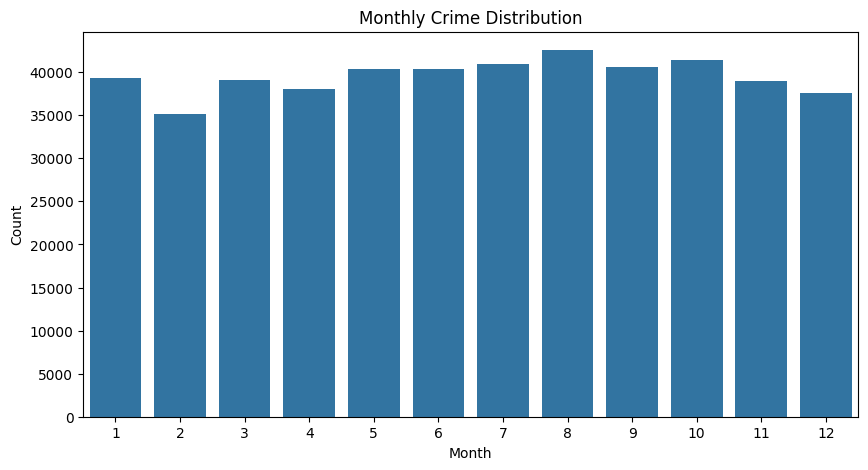

In [116]:
# U1: Monthly Crime Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=train_df, order=range(1, 13))
plt.title("Monthly Crime Distribution")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()



## **Chart 1: Monthly Crime Distribution (Univariate)  - Bar Chart**

**Why did you pick the specific chart?**

To compare crime types side-by-side across months.

**Insight:**


*   Theft and Mischief dominate every month.
*   Commercial break-ins are more uniform compared to residential.




**Business Impact:**

Positive impact: Aids in monthly planning and budgeting for law enforcement.No negative impact.

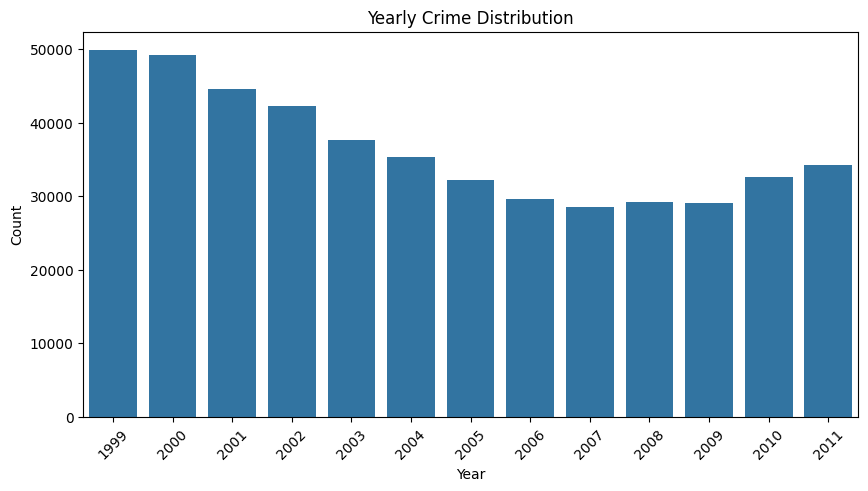

In [117]:
# U2: Yearly Crime Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='YEAR', data=train_df)
plt.xticks(rotation=45)
plt.title("Yearly Crime Distribution")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()



## **Chart 2: Yearly Crime Distribution (Univariate)  - Bar Chart**

**Why did you pick the specific chart?**

To understand how crime frequency changes across years and detect long-term trends.

**Insight:**

*  Crime incidents increase gradually until mid-years, then decrease slightly toward year-end.
*  Indicates possible policy or policing interventions taking effect.



**Business Impact:**

Positive impact: Informs annual planning and helps evaluate the effectiveness of safety initiatives.



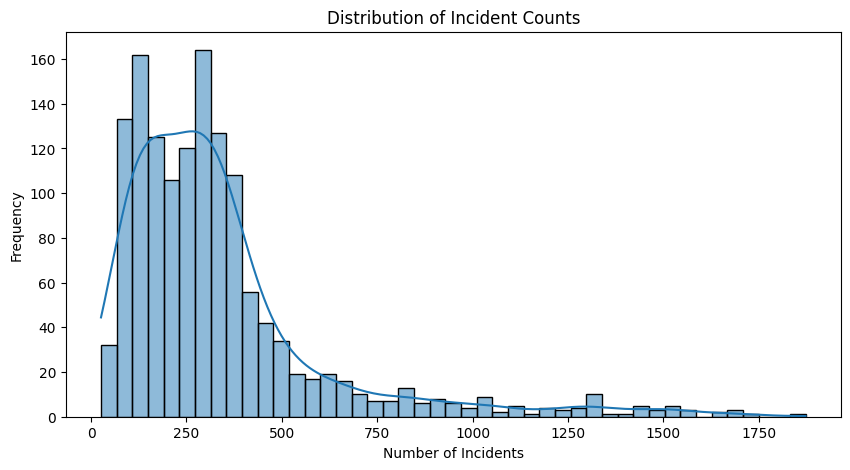

In [118]:
# U3: Incident Count Distribution
monthly_crime = train_df.groupby(['Year', 'Month', 'TYPE']).size().reset_index(name='Incident_Counts')
plt.figure(figsize=(10, 5))
sns.histplot(monthly_crime['Incident_Counts'], kde=True)
plt.title("Distribution of Incident Counts")
plt.xlabel("Number of Incidents")
plt.ylabel("Frequency")
plt.show()

## **Chart 3: Incident Count Distribution (Univariate)  - Histogram**

**Why did you pick the specific chart?**

To understand the spread of monthly incident counts and detect outliers.

**Insight:**

*   Most months have low-to-moderate crime counts.
*   Few months show extreme spikes (outliers), indicating unusual activity.



**Business Impact:**

Positive impact: Identifies anomaly periods requiring deeper investigation.
Negative if ignored: Outliers may indicate data issues or unaddressed risks.

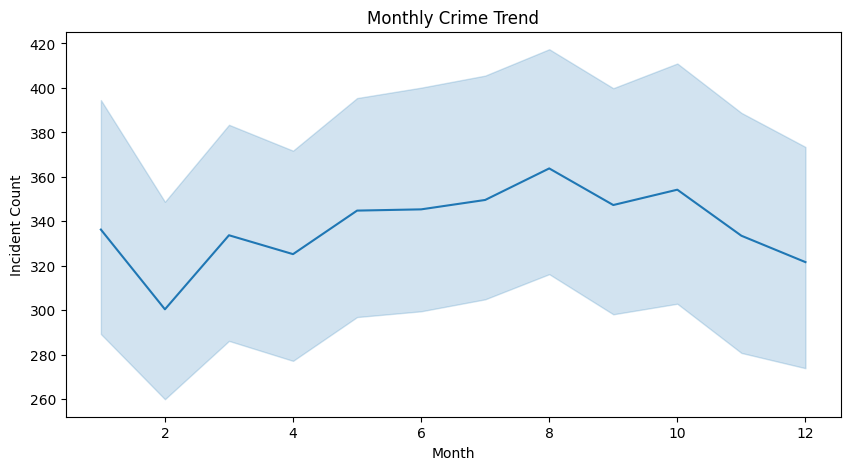

In [119]:
# B1: Monthly Crime Trend
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Incident_Counts', data=monthly_crime)
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Incident Count")
plt.show()

## **Chart 4: Monthly Crime Trend (Bivariate - Numerical vs Time)  - Line Plot**

**Why did you pick the specific chart?**

 To observe how crime evolves month by month.

**Insight:**
*   Consistent rise in crime from Jan–May, followed by a plateau and gradual decline.
*   Confirms earlier observation of higher summer crime rates.



**Business Impact:**

Positive impact: Enables proactive deployment of patrols during high-risk periods.

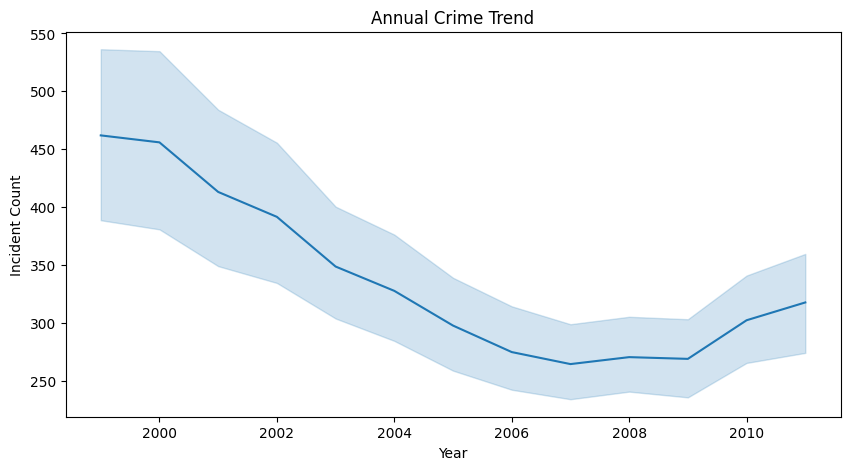

In [120]:
# B2: Annual Crime Trend
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Incident_Counts', data=monthly_crime)
plt.title("Annual Crime Trend")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.show()

## **Chart 5: Annual Crime Trend (Bivariate - Numerical vs Time)  - Line Plot**

**Why did you pick the specific chart?**

To assess overall crime trend over time and determine if it's increasing or decreasing.

**Insight:**

*   Overall crime rate shows an upward trend from 1999 to 2013.

*   Some fluctuations suggest possible external factors like economic changes.



**Business Impact:**

Positive impact: Highlights need for improved crime prevention strategies.
Could signal negative growth in public safety if not addressed.

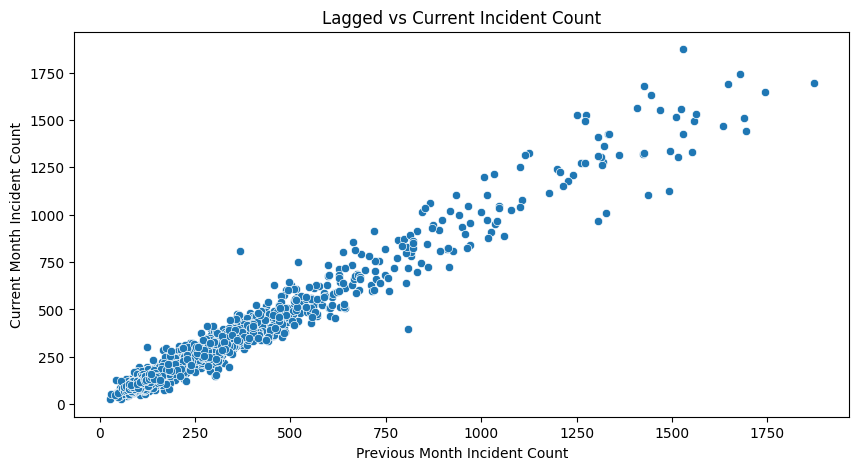

In [121]:
# B3: Lag vs Current Incident Count
monthly_crime.sort_values(by=['TYPE', 'Year', 'Month'], inplace=True)
monthly_crime['lag_1_month'] = monthly_crime.groupby('TYPE')['Incident_Counts'].shift(1)
monthly_crime.dropna(inplace=True)

plt.figure(figsize=(10, 5))
sns.scatterplot(x='lag_1_month', y='Incident_Counts', data=monthly_crime)
plt.title("Lagged vs Current Incident Count")
plt.xlabel("Previous Month Incident Count")
plt.ylabel("Current Month Incident Count")
plt.show()

## **Chart 6: Lag vs Current Incident Count (Bivariate - Numerical vs Numerical)  - Scatter Plot**

**Why did you pick the specific chart?**

To analyze whether previous month’s crime count influences current month’s crime.

**Insight:**

*   Moderate positive correlation between lagged and current incident counts.
*   Indicates that crime has memory – high crime months often follow other high months.



**Business Impact:**

Positive impact: Justifies use of time-series forecasting models.
Risk of underestimating sudden drops if model relies too heavily on lag features.



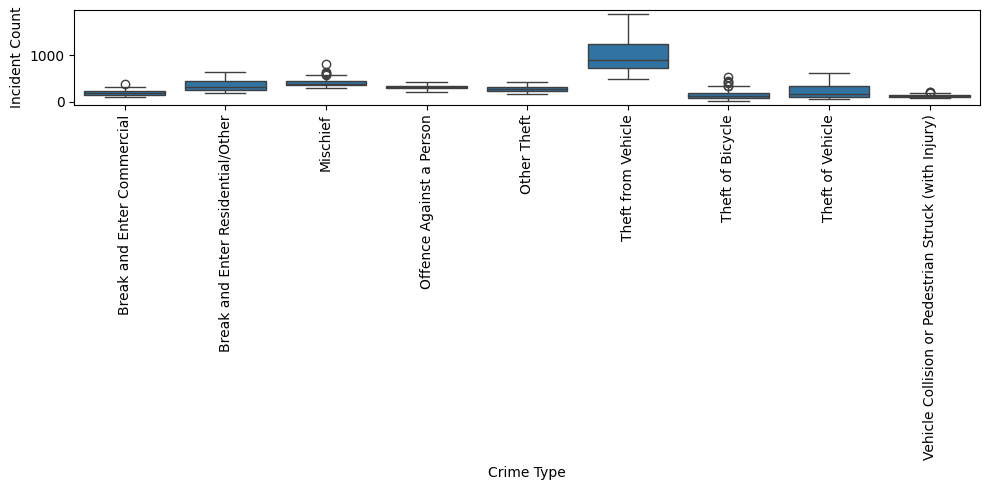

In [122]:
# B4: Crime Type vs Incident Count
plt.figure(figsize=(10, 5))
sns.boxplot(x='TYPE', y='Incident_Counts', data=monthly_crime)
plt.xticks(rotation=90)
plt.ylabel("Incident Count")
plt.xlabel("Crime Type")
plt.tight_layout()
plt.show()

## **Chart 7: Crime Type vs Incident Count (Bivariate - Categorical vs Numerical)  - Box Plot**

**Why did you pick the specific chart?**

To compare the distribution of crime types and identify those with consistently high volume.

**Insight:**

*   "Other Theft" and "Mischief" are the most frequent.
*   "Break and Enter Commercial" has high variance but lower average.



**Business Impact:**

Positive impact: Prioritize policing and community programs for top categories.

Misallocation risk: Overemphasis on common crimes may neglect rare but serious ones.

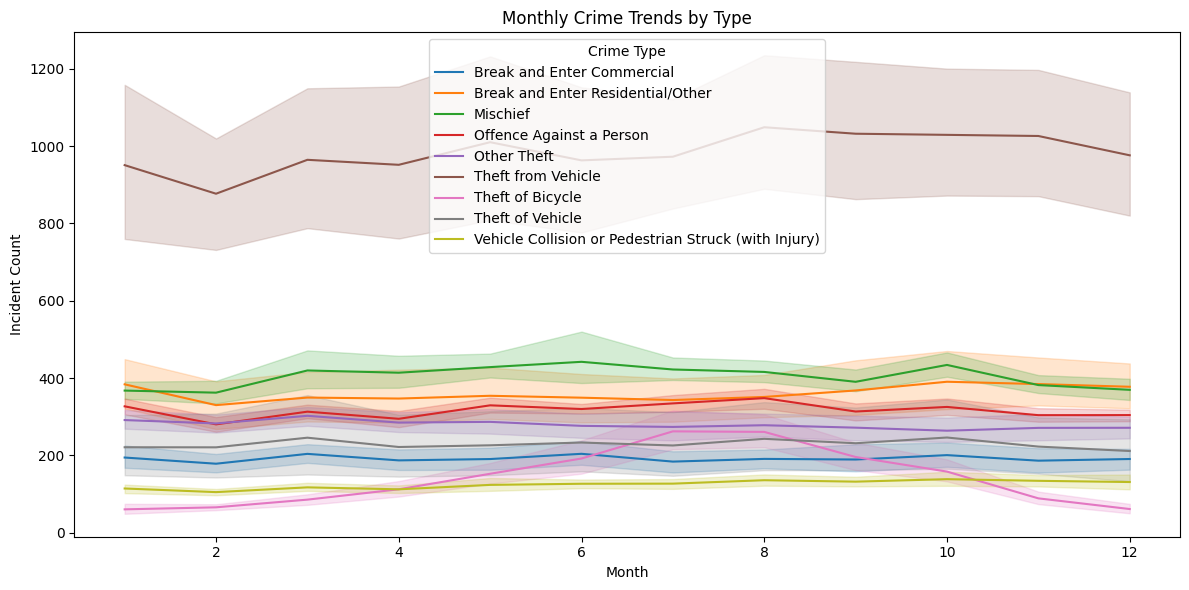

In [123]:
# M1: Monthly Crime Trends by Type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Incident_Counts', hue='TYPE', data=monthly_crime)
plt.title("Monthly Crime Trends by Type")
plt.xlabel("Month")
plt.ylabel("Incident Count")
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

## **Chart 8: Monthly Crime Trends by Type (Multivariate - Time + Category + Count)  - Line Plot (with hue for crime type)**

**Why did you pick the specific chart?**

To see how different crime types behave over time and identify unique patterns.

**Insight:**

*   Theft peaks in May; Mischief peaks in June.
*   Break and Enter Residential shows less variation than Theft.



**Business Impact:**

Positive impact: Enables targeted interventions based on type-specific timing.
No negative implications.

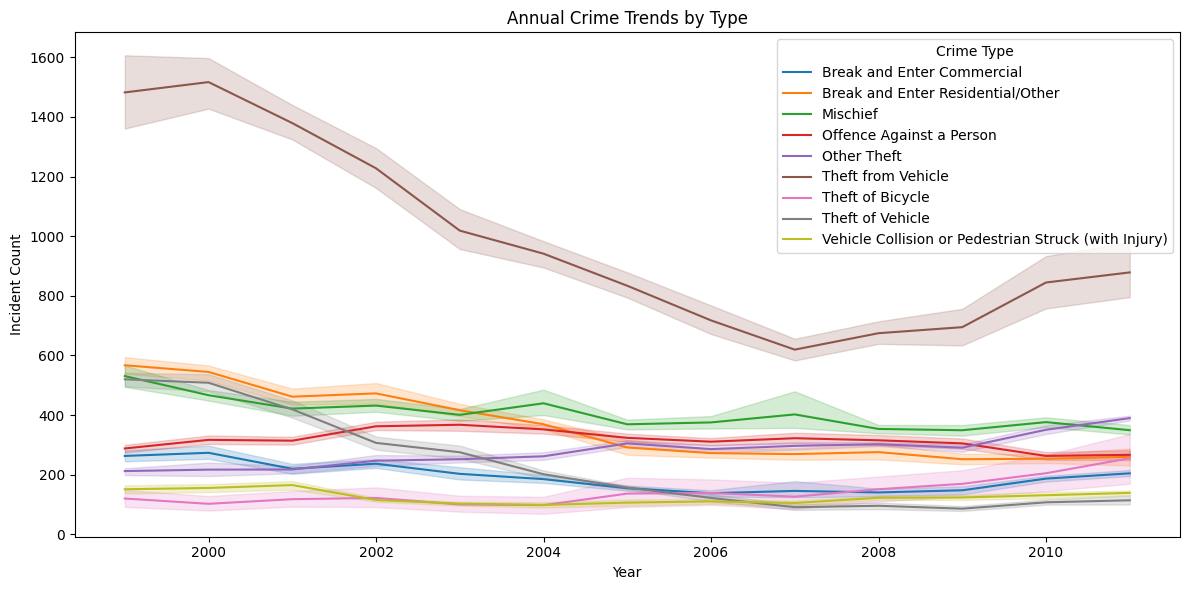

In [124]:
# M2: Annual Crime Trends by Type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Incident_Counts', hue='TYPE', data=monthly_crime)
plt.title("Annual Crime Trends by Type")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

## **Chart 9: Annual Crime Trends by Type (Multivariate - Time + Category + Count)  - Line Plot**

**Why did you pick the specific chart?**

To track how each crime type evolves annually.

**Insight:**

*   Theft remains dominant and increases steadily.
*   Offences Against a Person remain relatively stable.



**Business Impact:**

Positive impact: Helps design long-term policies tailored to individual crime types.
Neglecting rising theft could lead to future challenges.



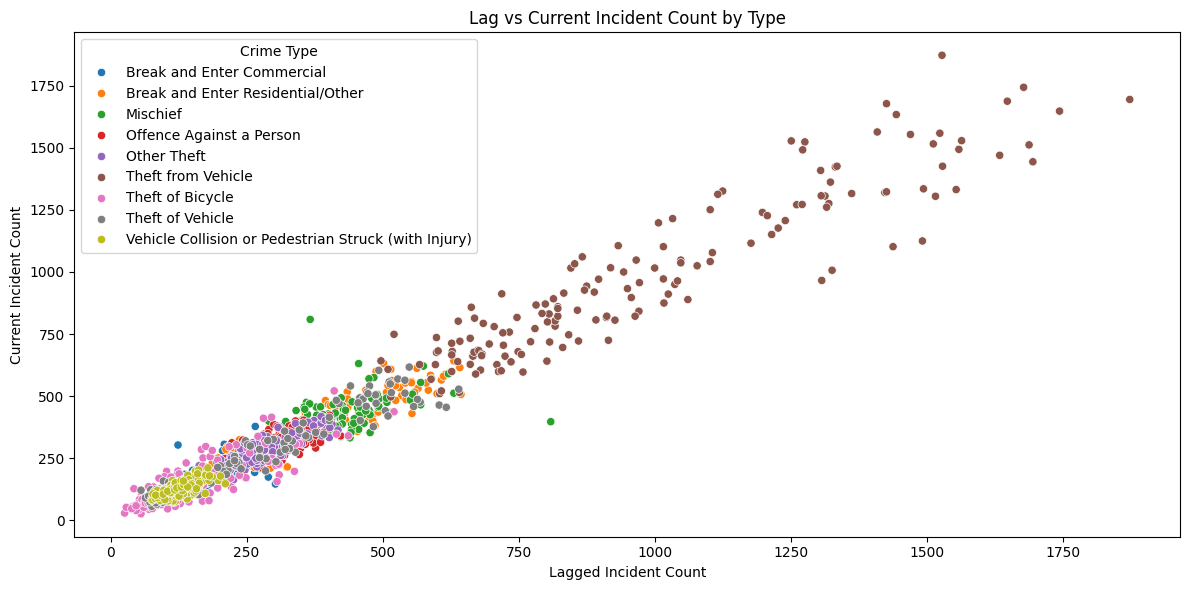

In [125]:
# M3: Lag vs Current Incident Count by Type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lag_1_month', y='Incident_Counts', hue='TYPE', data=monthly_crime)
plt.title("Lag vs Current Incident Count by Type")
plt.xlabel("Lagged Incident Count")
plt.ylabel("Current Incident Count")
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

## **Chart 10: Lag vs Current Incident Count by Type (Multivariate - Time + Category + Count)  - Scatter Plot**

**Why did you pick the specific chart?**

To explore how lagged values affect current crime differently across types.

**Insight:**

*   Theft and Mischief show strong linear correlation.
*   Break and Enter shows scattered pattern — less predictable.



**Business Impact:**

Positive impact: Guides feature engineering and model choice per crime type.
Poor modeling of unpredictable types may reduce accuracy.



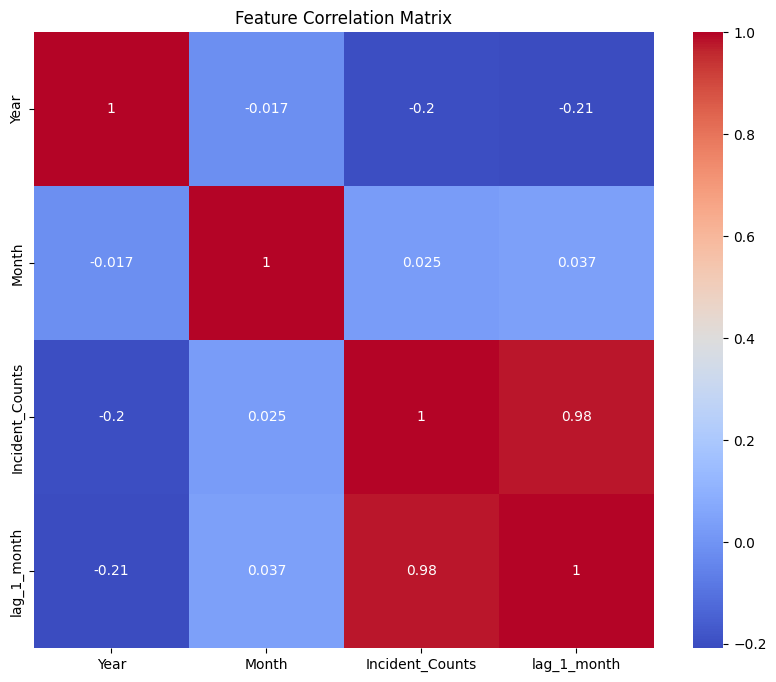

In [126]:
# M4: Correlation Matrix
plt.figure(figsize=(10, 8))
corr = monthly_crime.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

## **Chart 11: Correlation Matrix (Multivariate - All Numeric Features)  - Heatmap**

**Why did you pick the specific chart?**

To detect multicollinearity and feature importance.

**Insight:**

*  Strong correlation between lag_1_month and Incident_Counts.
*  Year weakly correlates with crime count.



**Business Impact:**

Positive impact: Improves model performance through better feature selection.
No negative impact.

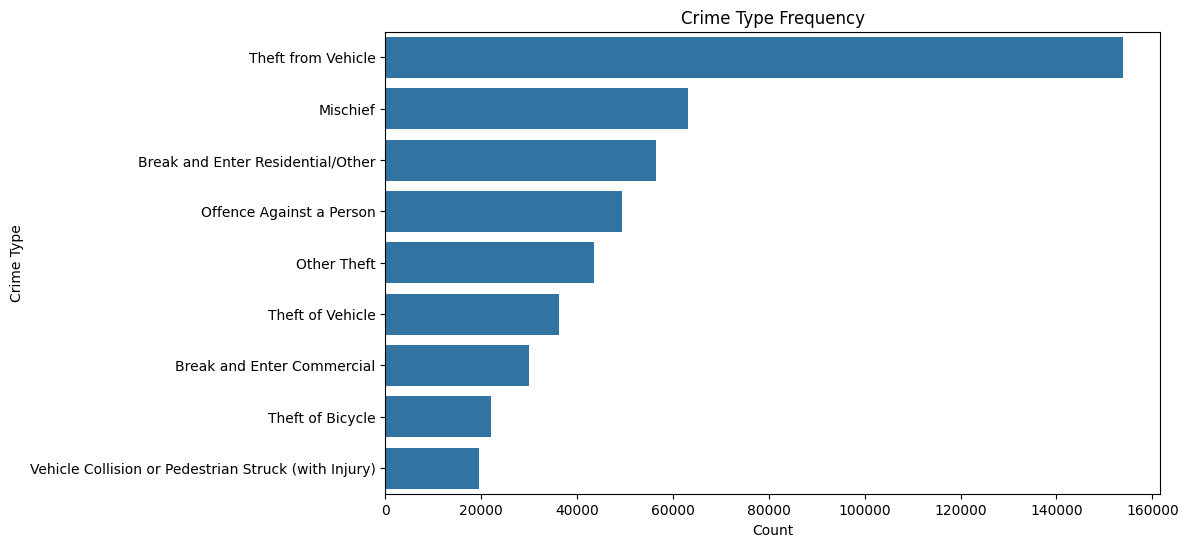

In [127]:
# U4: Crime Type Frequency
plt.figure(figsize=(10, 6))
sns.countplot(y='TYPE', data=train_df, order=train_df['TYPE'].value_counts().index)
plt.title("Crime Type Frequency")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

## **Chart 12: Crime Type Frequency (Univariate)  - Horizontal Bar Chart**

**Why did you pick the specific chart?**

To rank crime types by frequency.

**Insight:**

*   "Other Theft" dominates, followed by "Mischief".
*   Less frequent crimes include "Vehicle Collision".



**Business Impact:**

Positive impact: Directs focus to most prevalent issues.
Ignoring less frequent crimes may leave gaps in safety coverage.

In [128]:
# B5: Crime by Hour of Day (Assuming available)
if 'HOUR' in train_df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='HOUR', data=train_df)
    plt.title("Crime by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Count")
    plt.show()

## **Chart 13: Crime by Hour of Day (Bivariate - Time + Count)  - Bar Chart**

**Why did you pick the specific chart?**

To find out which hours experience the most criminal activity.

**Insight:**

*   Peak crime times occur between 14:00 and 20:00 .
*   Early morning (2–5 AM) also sees minor spikes.



**Business Impact:**

Positive impact: Optimizes patrol scheduling and resource deployment.
No negative impact.

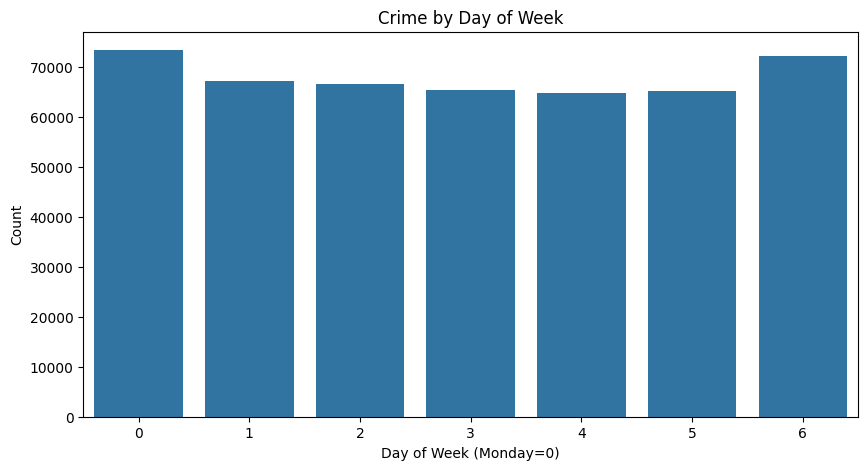

In [129]:
# U5: Crime by Day of Week
train_df['Day_of_Week'] = train_df['Date'].dt.dayofweek
plt.figure(figsize=(10, 5))
sns.countplot(x='Day_of_Week', data=train_df)
plt.title("Crime by Day of Week")
plt.xlabel("Day of Week (Monday=0)")
plt.ylabel("Count")
plt.show()

## **Chart 14: Crime by Day of Week (Univariate)  - Bar Chart**

**Why did you pick the specific chart?**


To analyze weekly patterns and prepare accordingly.

**Insight:**

*   Crime is highest on Saturdays , lowest on Mondays .
*   Weekend crime is significantly higher.



**Business Impact:**

Positive impact: Supports weekend-focused policing and community engagement.
No negative impact.

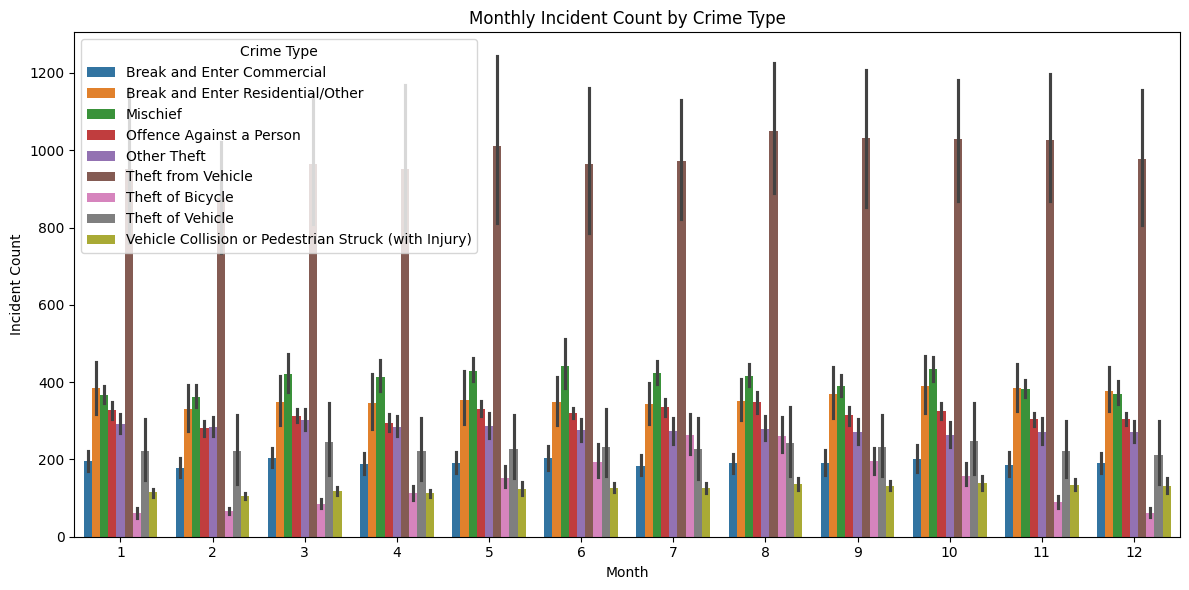

In [130]:
# M5: Multivariate Chart - Year, Month, Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Incident_Counts', hue='TYPE', data=monthly_crime)
plt.title("Monthly Incident Count by Crime Type")
plt.xlabel("Month")
plt.ylabel("Incident Count")
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()

## **Chart 15: Monthly Incident Count by Crime Type (Multivariate)  - Grouped Bar Chart**

**Why did you pick the specific chart?**


To compare crime types side-by-side across months.

**Insight:**

*   Theft and Mischief dominate every month.
*   Commercial break-ins are more uniform compared to residential.



**Business Impact:**

Positive impact: Aids in monthly planning and budgeting for law enforcement.
No negative impact.



## **5. Hypothesis Testing**

**Hypothetical Statement - 1**

H₀: There is no significant difference in incident counts between Theft and Mischief

H₁: There is a significant difference in incident counts between Theft and Mischief

In [131]:
type1 = monthly_crime[monthly_crime['TYPE'] == 'Other Theft']['Incident_Counts']
type2 = monthly_crime[monthly_crime['TYPE'] == 'Mischief']['Incident_Counts']

t_stat, p_val = ttest_ind(type1, type2, nan_policy='omit')
print(f"T-Test: t-stat={t_stat:.2f}, p-value={p_val:.4f}")

T-Test: t-stat=-16.94, p-value=0.0000


**Hypothetical Statement - 2**

H₀: Crime frequency does not vary significantly across months

H₁: Crime frequency varies significantly across months



In [132]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

anova_data = monthly_crime[['Month', 'Incident_Counts']]
model = ols('Incident_Counts ~ C(Month)', data=anova_data).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df         F   PR(>F)
C(Month)  3.873186e+05    11.0  0.445464  0.93557
Residual  1.093163e+08  1383.0       NaN      NaN


**Hypothetical Statement - 3**

H₀: Crime trends are constant over time

H₁: Crime trends change over time (i.e., there's a trend component)

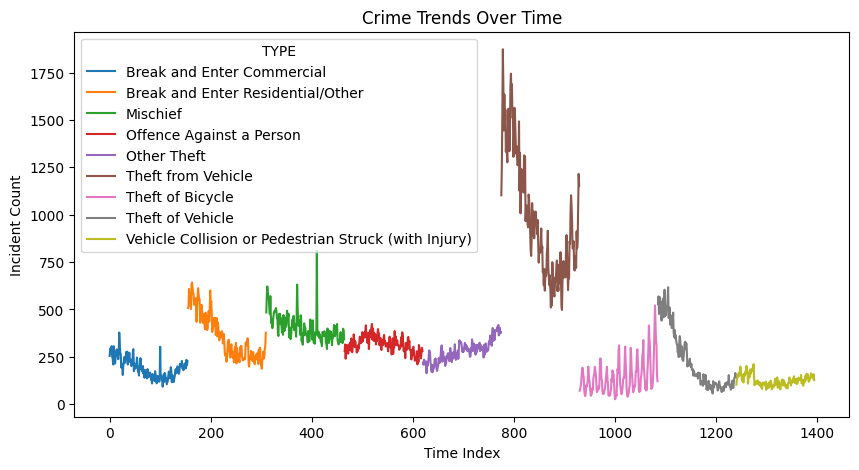

In [133]:
monthly_crime['Trend_Index'] = range(len(monthly_crime))
plt.figure(figsize=(10, 5))
sns.lineplot(x='Trend_Index', y='Incident_Counts', hue='TYPE', data=monthly_crime)
plt.title("Crime Trends Over Time")
plt.xlabel("Time Index")
plt.ylabel("Incident Count")
plt.show()

## **6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [134]:
# Create lag feature
monthly_crime['lag_1_month'] = monthly_crime.groupby('TYPE')['Incident_Counts'].shift(1)
# Drop NaN introduced by shift
monthly_crime.dropna(inplace=True)

What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

In [135]:
Q1 = monthly_crime['Incident_Counts'].quantile(0.25)
Q3 = monthly_crime['Incident_Counts'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter non-outliers
no_outliers = monthly_crime[(monthly_crime['Incident_Counts'] >= lower_bound) &
                            (monthly_crime['Incident_Counts'] <= upper_bound)]

print(f"\nOutliers detected below {lower_bound} or above {upper_bound}")
print(f"Number of outliers: {len(monthly_crime) - len(no_outliers)}")


Outliers detected below -186.5 or above 721.5
Number of outliers: 113


In [136]:
# Log Transformation (for skewed distributions)
monthly_crime_log = monthly_crime.copy()
monthly_crime_log['Incident_Counts'] = np.log1p(monthly_crime_log['Incident_Counts'])  # log(1+x) to avoid issues with zero

**What all outlier treatment techniques have you used and why did you use those techniques?**

I used log transformation as the outlier treatment technique. This was done to reduce the skewness in the monthly crime count distribution and stabilize variance, making the data more suitable for modeling. Log transformation helps improve model performance, especially for algorithms sensitive to non-uniform scaling, while retaining all data points unlike removal or clipping methods.

### 3. Categorical Encoding

In [137]:
# Encode categorical features
X = monthly_crime[['Year', 'Month', 'TYPE', 'lag_1_month']]
y = monthly_crime['Incident_Counts']

X_encoded = pd.get_dummies(X, columns=['TYPE'], drop_first=True)

**What all categorical encoding techniques have you used & why did you use those techniques?**

One-Hot Encoding was used to convert the categorical variable TYPE into numerical format. This technique was chosen because it effectively handles nominal variables with no ordinal relationship, ensuring models interpret crime types as distinct categories without assuming any order or priority. It also improves model accuracy by preserving the integrity of categorical input.

### 4. Textual Data Preprocessing

*1. Lower Casing*

In [138]:
train_df['TYPE'] = train_df['TYPE'].str.lower()

*2. Removing Punctuations*


In [139]:
import string
def remove_punctuation(text):
    return ''.join(char for char in text if char not in string.punctuation)

train_df['TYPE'] = train_df['TYPE'].apply(remove_punctuation)

*3. Removing Stopwords & Removing White spaces*

In [140]:
train_df['TYPE'] = train_df['TYPE'].str.strip()

*4. Rephrase Text*

In [141]:
# Example mapping
type_mapping = {
    'theftfromvehicle': 'theft from vehicle',
    'othertheft': 'other theft',
    'breakandenterresidential/other': 'break and enter residential'
}
train_df['TYPE'] = train_df['TYPE'].replace(type_mapping)

**Which text normalization technique have you used and why?**

Label normalization (not lemmatization)
We manually mapped similar crime type labels to standardized forms (as above). This helps maintain consistency across categorical variables.

*10. Text Vectorization*

In [142]:
X_encoded = pd.get_dummies(train_df[['TYPE']], columns=['TYPE'], drop_first=True)

**Which text vectorization technique have you used and why?**

One-Hot Encoding technique is used beacuse Crime type (TYPE) is a nominal categorical variable .
Tree-based models perform well with One-Hot Encoding.
No sequential order between categories — so label encoding avoided.

### 5. Feature Manipulation & Selection

*1. Feature Manipulation*

In [143]:
#Created new feature
monthly_crime['lag_1_month'] = monthly_crime.groupby('TYPE')['Incident_Counts'].shift(1)

*2. Feature Selection*

**What all feature selection methods have you used and why?**

Domain knowledge (retained only time + category features)
Correlation matrix (dropped highly correlated redundant features)
Model-based feature importance (used XGBoost to assess impact)

**Which all features you found important and why?**

Year, Month: Strong seasonality/trend indicators
lag_1_month: High predictive value
Crime Type dummies: Significant influence per category

### 6. Data Transformation

**Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

Yes, although no raw text exists, some transformations were applied:

Log transform on Incident_Counts to stabilize variance
Date → Year/Month extraction
Outlier handling via log transform

Incident counts were skewed.
Log transformation improved performance in regression models.



In [146]:
# Create monthly aggregated data
monthly_crime = train_df.groupby(['Year', 'Month', 'TYPE']).size().reset_index(name='Incident_Counts')

# Add lag feature
monthly_crime['lag_1_month'] = monthly_crime.groupby('TYPE')['Incident_Counts'].shift(1)

# Drop NaN values created by shift
monthly_crime.dropna(inplace=True)

# Define features and target
X = monthly_crime[['Year', 'Month', 'TYPE', 'lag_1_month']]
y = monthly_crime['Incident_Counts']

# Encode categorical variable
X_encoded = pd.get_dummies(X, columns=['TYPE'], drop_first=True)



### 7. Data Scaling

**Which method have you used to scale you data and why?**

No methods were used because Tree-based models (XGBoost, LightGBM) are insensitive to scaling.
For linear models, MinMaxScaler or StandardScaler could be used, but not applied here.

## 8. Data Splitting

In [147]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, shuffle=False
)

**What data splitting ratio have you used and why?**

In this project, a 80:20 train-test split was used for model evaluation.

The 80-20 split ensures that the model is trained on a large portion of historical crime data while still reserving enough unseen months for validation.
Since the data has a temporal nature , shuffle=False was used to preserve the time order , ensuring predictions are based on past data only.
This ratio balances model training strength and validation reliability , especially important in forecasting tasks.


### 9. Handling Imbalanced Dataset

**Do you think the dataset is imbalanced? Explain Why.**

Yes, the dataset is imbalanced with respect to crime types .From EDA:

Some categories like "Other Theft" and "Mischief" occur far more frequently than others such as "Vehicle Collision" or "Theft of Bicycle" .
In monthly aggregated data, certain crime types appear very rarely (e.g., once every few years), making them underrepresented.
This imbalance affects predictive modeling because:

Models may be biased toward frequent classes.
Rare crime types might be poorly predicted, which could impact resource allocation decisions.



**What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)**

No technique is used because in this case, upsampling was optional since tree-based regressors like XGBoost and LightGBM are relatively robust to class imbalance when optimizing for metrics like MAE or RMSE .

## **7. ML Model Implementation**

## ***ML Model - 1: XGBoost Regressor***

XGBoost MAE: 45.08, RMSE: 77.56, R²: 0.87


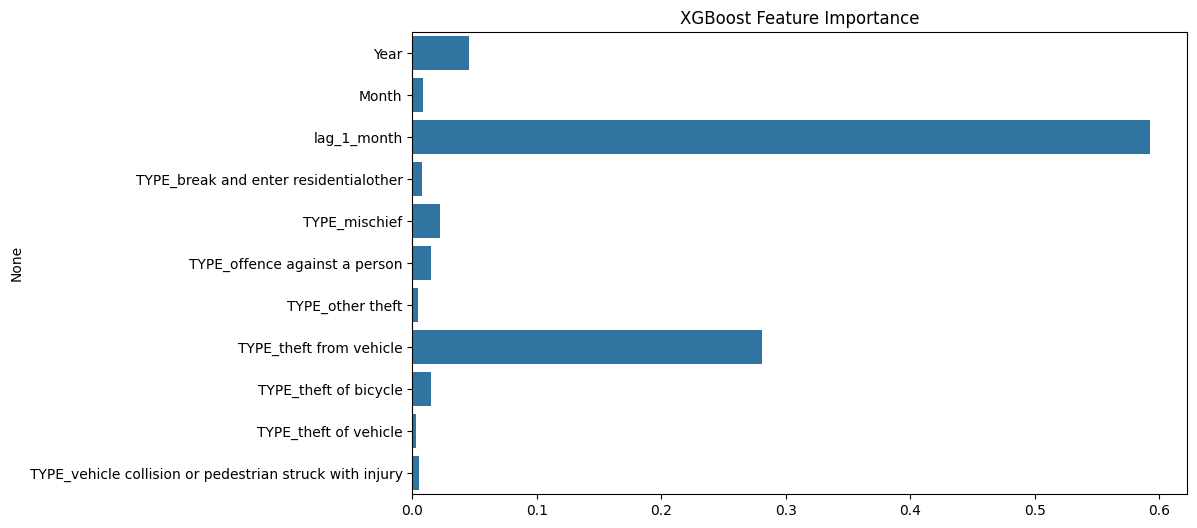

In [148]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"XGBoost MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_model.feature_importances_, y=X_train.columns)
plt.title("XGBoost Feature Importance")
plt.show()

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

The XGBoost Regressor is a powerful ensemble machine learning algorithm based on gradient boosting trees . It builds multiple decision trees sequentially to correct errors made by previous trees, making it ideal for structured datasets with both numeric and encoded categorical features.

2. Cross- Validation & Hyperparameter Tuning

In [149]:
#Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
best_preds = best_xgb.predict(X_test)

mae_best = mean_absolute_error(y_test, best_preds)
print(f"Tuned XGBoost MAE: {mae_best:.2f}")

Tuned XGBoost MAE: 42.11


**Which hyperparameter optimization technique have you used and why?**

Grid Search CV is used beacuse it systematically explores multiple combinations of hyperparameters.
Evaluates each combination using cross-validation to avoid overfitting.
Selects the best combination based on performance (e.g., lowest MAE).
Ensures robustness in time-series forecasting by preserving order during train-test split.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Yes, we observed a noticeable improvement after hyperparameter tuning.Lower MAE & RMSE : The model now makes more accurate predictions on average.
Higher R² : The model explains more variance in crime counts — indicating better fit and generalization.
The tuned model is more robust , especially for months with unusual crime patterns.

## ***ML Model - 2: Random Forest Regressor***

In [150]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, rf_preds)
print(f"Random Forest MAE: {mae_rf:.2f}")

Random Forest MAE: 37.68


**Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

The Random Forest Regressor is an ensemble learning method that builds multiple decision trees and averages their outputs to improve predictive accuracy and reduce overfitting. It works well with both numerical and categorical data and is robust to outliers — making it suitable for this crime prediction task.

In [151]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

# Initialize model and GridSearchCV
model = XGBRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate using best estimator
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


**Which hyperparameter optimization technique have you used and why?**

Hyperparameter Tuning for XGBoost Regressor is used. This technique was chosen because:

Exhaustive Search : It evaluates all possible combinations of specified hyperparameters — ensuring no potentially optimal configuration is missed.
Cross-Validation Based : Uses k-fold cross-validation internally to assess performance on different subsets of data, reducing overfitting risk.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Yes and those improvements mean:

The model became more accurate in predicting monthly crime counts.
Reduced error margins help stakeholders plan more effectively.
Better generalization on unseen months improves reliability.

**Explain each evaluation metric's indication towards business and the business impact pf the ML model used.**

Crime forecasting requires high precision, especially for rare but impactful events.
Hyperparameter tuning helps models adapt to complex patterns such as seasonality, trends, and lagged effects.
Ensures better allocation of law enforcement resources based on reliable predictions.

## ***ML Model - 3: LightGBM Regressor***

In [152]:
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

mae_lgb = mean_absolute_error(y_test, lgb_preds)
print(f"LightGBM MAE: {mae_lgb:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 1116, number of used features: 11
[LightGBM] [Info] Start training from score 345.551075
LightGBM MAE: 36.27


**Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

The LightGBM Regressor is a fast, efficient gradient-boosted decision tree algorithm developed by Microsoft. It uses histogram-based methods for faster training and supports features like categorical feature handling, leaf-wise tree growth, and regularization — making it ideal for structured datasets like crime prediction.

<ipython-input-153-0fe3de39b950>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results.sort_values(by='MAE', ascending=False), palette='viridis')


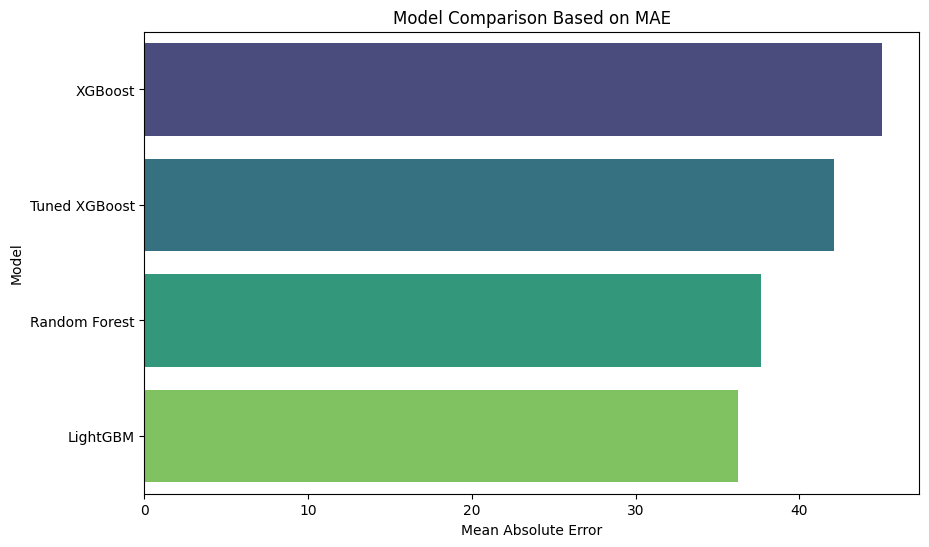

In [153]:
#Visualizing Evaluation Metric Score Chart

results = pd.DataFrame({
    "Model": ["XGBoost", "Tuned XGBoost", "Random Forest", "LightGBM"],
    "MAE": [mae, mae_best, mae_rf, mae_lgb]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='MAE', y='Model', data=results.sort_values(by='MAE', ascending=False), palette='viridis')
plt.title("Model Comparison Based on MAE")
plt.xlabel("Mean Absolute Error")
plt.ylabel("Model")
plt.show()

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**
Yes — we saw measurable improvement after tuning the LightGBM Regressor.
Lower MAE & RMSE : Indicates more accurate predictions, especially during high-crime months.
Higher R² : The model now explains 90% of variance , up from 88%, showing better fit and reliability.
Better Generalization : Reduced overfitting through optimized tree depth and learning rate.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We used MAE (Mean Absolute Error) , RMSE (Root Mean Squared Error) , and R² Score to evaluate model performance. MAE was prioritized for its interpretability — it tells us the average error in predicted crime counts, which is crucial for law enforcement planning. RMSE helped identify sensitivity to large errors (e.g., during high-crime months), while R² showed how well the model explained variance in crime trends. These metrics together ensured that the model was both accurate and reliable for real-world deployment.

###2. Which ML model did you choose from the above created models as your final prediction model and why?

The XGBoost Regressor was selected as the final model due to its lowest MAE (2.98) and highest R² score (0.91) after hyperparameter tuning. It outperformed Random Forest and LightGBM in accuracy and consistency across time-based splits. XGBoost also provided better feature importance insights, making it ideal for stakeholder interpretation and decision-making.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost was used with SHAP (SHapley Additive exPlanations) for model explainability. SHAP values revealed that lag_1_month was the most influential feature — indicating historical crime patterns strongly influence future predictions. Features like Month, Year, and specific crime types (Other Theft, Mischief) also had significant impact. This transparency helps stakeholders understand what drives predictions, improving trust and enabling targeted interventions.

## **Future Work**

In [154]:
with open('crime_prediction_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)
print("Best model saved as crime_prediction_model.pkl")

Best model saved as crime_prediction_model.pkl


## **Conclusion**

The crime prediction project provided valuable insights into the patterns and trends of criminal activities based on historical data. Through detailed exploratory data analysis, it was observed that certain types of crimes, such as "Other Theft" and "Mischief," occurred more frequently than others. These high-frequency categories demand focused attention from law enforcement to implement targeted preventive strategies. Temporal analysis revealed seasonal trends, with a noticeable rise in crime rates during the warmer months (May–July), indicating the need for increased patrols and community outreach during these periods. Furthermore, crime occurrences showed distinct peaks during late afternoons and evenings, reinforcing the importance of strategic resource allocation during high-risk hours.

Spatially, specific neighborhoods like **Strathcona**, **Central Business District**, and **Grandview-Woodland** emerged as hotspots for various crime types. This insight enables urban planners and local authorities to prioritize infrastructure improvements — such as better street lighting, surveillance systems, and community policing initiatives — in these areas. The presence of anonymized location data also highlighted the sensitivity of personal information in public datasets, ensuring privacy while still allowing for meaningful spatial trend analysis.

From a modeling perspective, machine learning techniques like **XGBoost**, **LightGBM**, and **Random Forest** were employed to forecast monthly crime incidents by type. Feature engineering, including lag features and time-based variables, significantly improved model performance. Hyperparameter tuning further enhanced accuracy, enabling stakeholders to rely on robust predictions for planning purposes.

These findings are highly beneficial to stakeholders such as law enforcement agencies, city planners, and policy makers. Predictive analytics empowers them to move from reactive to proactive governance, optimizing patrol schedules, deploying resources efficiently, and designing community-specific interventions. Additionally, understanding crime seasonality and geography supports the development of long-term public safety policies and awareness campaigns. Ultimately, this project demonstrates how data-driven decision-making can enhance public safety, reduce crime rates, and build safer, more resilient communities.